In [1]:
import ROOT 
import uproot
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.18/04


In [2]:
gen_jet_events  = uproot.open('TTJets_DiLept_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU_1.root')['Delphes']['GenJet']
gen_jet_eta     = gen_jet_events['GenJet.Eta'].array()
gen_jet_phi     = gen_jet_events['GenJet.Phi'].array()
gen_jet_pt      = gen_jet_events['GenJet.PT'].array()

In [3]:
jet_PUPPI_events  = uproot.open('TTJets_DiLept_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU_1.root')['Delphes']['JetPUPPI']
jet_PUPPI_eta     = jet_PUPPI_events['JetPUPPI.Eta'].array()
jet_PUPPI_phi     = jet_PUPPI_events['JetPUPPI.Phi'].array()
jet_PUPPI_pt      = jet_PUPPI_events['JetPUPPI.PT'].array()
jet_PUPPI_btag    = jet_PUPPI_events['JetPUPPI.BTag'].array() 
jet_PUPPI_charge  = jet_PUPPI_events['JetPUPPI.Charge'].array() 

In [4]:
electron_CHS_events  = uproot.open('TTJets_DiLept_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU_1.root')['Delphes']['ElectronCHS']
electron_CHS_eta     = electron_CHS_events['ElectronCHS.Eta'].array()
electron_CHS_phi     = electron_CHS_events['ElectronCHS.Phi'].array()
electron_CHS_pt      = electron_CHS_events['ElectronCHS.PT'].array()
electron_CHS_charge  = electron_CHS_events['ElectronCHS.Charge'].array()

In [5]:
muon_CHS_events  = uproot.open('TTJets_DiLept_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU_1.root')['Delphes']['MuonTightCHS']
muon_CHS_eta     = muon_CHS_events['MuonTightCHS.Eta'].array()
muon_CHS_phi     = muon_CHS_events['MuonTightCHS.Phi'].array()
muon_CHS_pt      = muon_CHS_events['MuonTightCHS.PT'].array()
muon_CHS_charge  = muon_CHS_events['MuonTightCHS.Charge'].array()

In [6]:
tt_event_count    = uproot.open('emu_ttbarsignalplustau.root')['weightedEvents']
tt_events_gen     = uproot.open('emu_ttbarsignalplustau.root')['ttBar_treeVariables_step0']
tt_events_reco    = uproot.open('emu_ttbarsignalplustau.root')['ttBar_treeVariables_step8']

tt_l_pt           = tt_events_reco['l_pt'].array()
tt_l_eta          = tt_events_reco['l_eta'].array()
tt_l_phi          = tt_events_reco['l_phi'].array()

tt_lbar_pt        = tt_events_reco['lbar_pt'].array()
tt_lbar_eta       = tt_events_reco['lbar_eta'].array()
tt_lbar_phi       = tt_events_reco['lbar_phi'].array()

tt_b_pt           = tt_events_reco['b_pt'].array()
tt_b_eta          = tt_events_reco['b_eta'].array()
tt_b_phi          = tt_events_reco['b_phi'].array()

tt_bbar_pt        = tt_events_reco['bbar_pt'].array()
tt_bbar_eta       = tt_events_reco['bbar_eta'].array()
tt_bbar_phi       = tt_events_reco['bbar_phi'].array()


tt_llbar_dphi     = tt_events_reco['llbar_delta_phi'].array()
tt_llbar_dphi     = tt_events_reco['llbar_delta_phi'].array()

tt_bbbar_dphi     = tt_events_reco['bbbar_delta_phi'].array()
tt_gen_bbbar_dphi = tt_events_gen['gen_bbbar_delta_phi'].array()

tt_bbbar_deta     = tt_events_reco['bbbar_delta_eta'].array()
tt_gen_bbbar_deta = tt_events_gen['gen_bbbar_delta_eta'].array()

tt_event_weight   = tt_events_gen['eventWeight'].array()

In [7]:
jet_deta = []
for i in range(len(jet_PUPPI_eta)) :
    if (len(jet_PUPPI_eta[i]) > 1) :
            if (jet_PUPPI_pt[i][1] > 30) and (abs(jet_PUPPI_eta[i][0]) < 2.5) and (abs(jet_PUPPI_eta[i][0]) < 2.5):
                jet1_eta = jet_PUPPI_eta[i][0] 
                jet2_eta = jet_PUPPI_eta[i][1]
                jet_deta.append(abs(jet1_eta - jet2_eta))

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


Text(0, 0.5, 'Arbitrary Units')

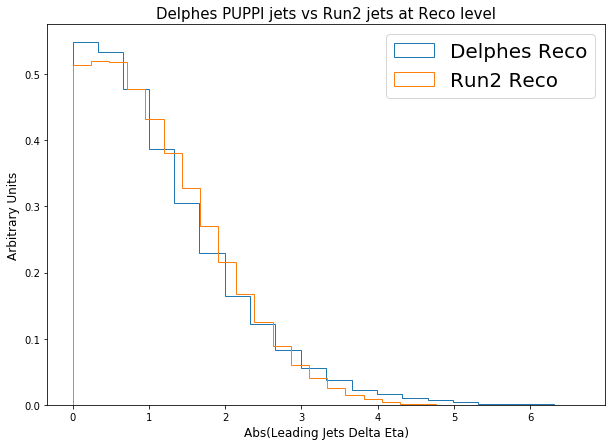

In [64]:
fig_style = {
    'figsize': (10, 7),
}

fig, ax = plt.subplots(**fig_style)

plt.title('Delphes PUPPI jets vs Run2 jets at Reco level', fontsize=15)
plt.hist(jet_deta, histtype='step', label = 'Delphes Reco', normed=True, bins=20)
plt.hist(tt_bbbar_deta, histtype='step' , label = 'Run2 Reco', normed=True, bins=20)

ax.legend(prop={'size': 20}, loc='upper right')
plt.xlabel('Abs(Leading Jets Delta Eta)', fontsize=12)
plt.ylabel('Arbitrary Units', fontsize=12)

In [31]:
jet_dphi = []
for i in range(len(jet_PUPPI_phi)) :
    if (len(jet_PUPPI_phi[i]) > 1) :
        if (jet_PUPPI_pt[i][1] > 30) and (abs(jet_PUPPI_eta[i][0]) < 2.5) and (abs(jet_PUPPI_eta[i][1]) < 2.5) :
            jet1_phi = jet_PUPPI_phi[i][0]
            jet2_phi = jet_PUPPI_phi[i][1]
            jet_dphi.append(abs(abs(abs(jet1_phi - jet2_phi) - np.pi) - np.pi))

Text(0, 0.5, 'Arbitrary Units')

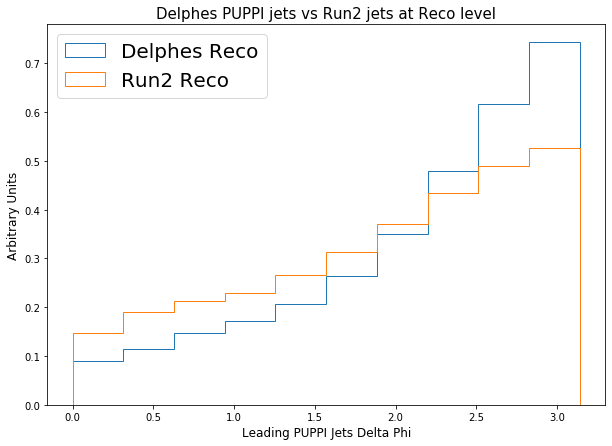

In [33]:
fig_style = {
    'figsize': (10, 7),
}

fig, ax = plt.subplots(**fig_style)

plt.title('Delphes PUPPI jets vs Run2 jets at Reco level', fontsize=15)
plt.hist(jet_dphi, histtype='step', label = 'Delphes Reco', density=True)
plt.hist(tt_bbbar_dphi, histtype='step' , label = 'Run2 Reco', density=True)

ax.legend(prop={'size': 20}, loc='upper left')
plt.xlabel('Leading PUPPI Jets Delta Phi', fontsize=12)
plt.ylabel('Arbitrary Units', fontsize=12)

In [29]:
jet_dphi = []
for i in range(len(jet_PUPPI_eta)) :
    if (len(jet_PUPPI_eta[i]) > 2) :
        if (jet_PUPPI_pt[i][1] > 30) :
            jet1_phi = jet_PUPPI_phi[i][0]
            jet2_phi = jet_PUPPI_phi[i][1]
            jet_dphi.append(abs(abs(abs(jet1_phi - jet2_phi) - np.pi) - np.pi))

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


ValueError: weights should have the same shape as x

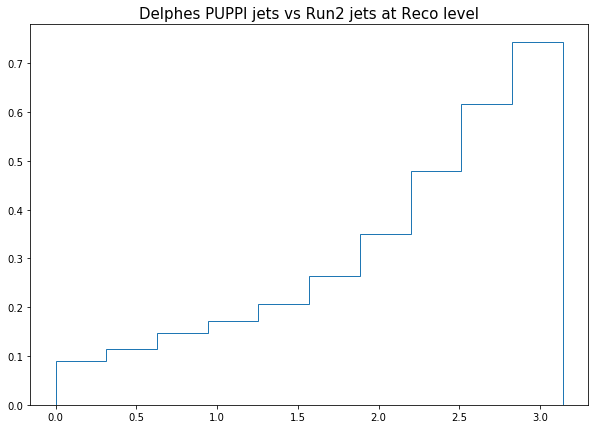

In [32]:
fig_style = {
    'figsize': (10, 7),
}

fig, ax = plt.subplots(**fig_style)

plt.title('Delphes PUPPI jets vs Run2 jets at Reco level', fontsize=15)
plt.hist(jet_dphi, histtype='step', label = 'Delphes Reco', normed=True)
plt.hist(tt_bbbar_dphi, histtype='step' , label = 'Run2 Reco', normed=True, weights=tt_event_weight)

ax.legend(prop={'size': 20}, loc='upper left')
plt.xlabel('Leading PUPPI Jets Delta Phi', fontsize=12)
plt.ylabel('Arbitrary Units', fontsize=12)

In [9]:
gen_jet_deta = []
for i in range(len(jet_PUPPI_eta)) :
    if (len(gen_jet_eta[i]) > 1) :
            jet1_eta = gen_jet_eta[i][0]
            jet2_eta = gen_jet_eta[i][1]
            gen_jet_deta.append(abs(jet1_eta - jet2_eta))

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


Text(0, 0.5, 'Arbitrary Units')

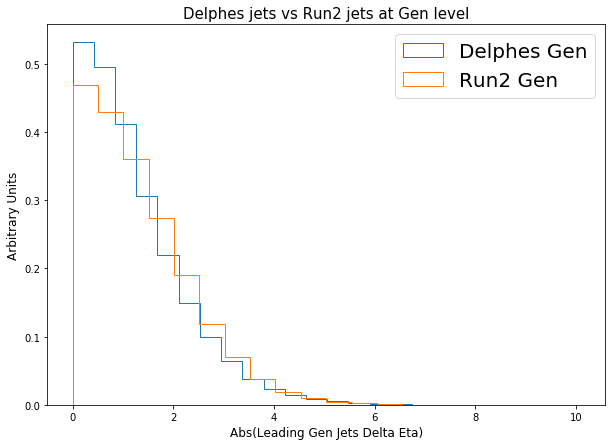

In [14]:
fig_style = {
    'figsize': (10, 7),
}

fig, ax = plt.subplots(**fig_style)

plt.title('Delphes jets vs Run2 jets at Gen level', fontsize=15)
plt.hist(gen_jet_deta, histtype='step', label = 'Delphes Gen', normed=True, bins= 20)
plt.hist(tt_gen_bbbar_deta, histtype='step' , label = 'Run2 Gen', normed=True, bins =20)

ax.legend(prop={'size': 20}, loc='upper right')
plt.xlabel('Abs(Leading Gen Jets Delta Eta)', fontsize=12)
plt.ylabel('Arbitrary Units', fontsize=12)

In [10]:
gen_jet_dphi = []
for i in range(len(jet_PUPPI_eta)) :
    if (len(gen_jet_eta[i]) > 1) :
            jet1_phi = gen_jet_phi[i][0]
            jet2_phi = gen_jet_phi[i][1]
            gen_jet_dphi.append(abs(abs(abs(jet1_phi - jet2_phi) - np.pi) - np.pi))

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


Text(0, 0.5, 'Arbitrary Units')

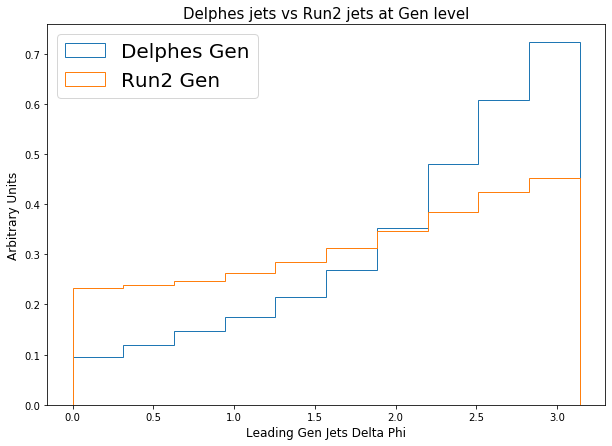

In [16]:
fig_style = {
    'figsize': (10, 7),
}

fig, ax = plt.subplots(**fig_style)

plt.title('Delphes jets vs Run2 jets at Gen level', fontsize=15)
plt.hist(gen_jet_dphi, histtype='step', label = 'Delphes Gen', normed=True)
plt.hist(tt_gen_bbbar_dphi, histtype='step' , label = 'Run2 Gen', normed=True)

ax.legend(prop={'size': 20}, loc='upper left')
plt.xlabel('Leading Gen Jets Delta Phi', fontsize=12)
plt.ylabel('Arbitrary Units', fontsize=12)

In [11]:
deta = np.array(jet_deta)
dphi = np.array(jet_dphi)

In [12]:
delphes_dR = np.sqrt(deta**2 + dphi**2)
dR = np.sqrt(tt_bbbar_deta**2 + tt_bbbar_dphi**2)

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


Text(0, 0.5, 'Arbitrary Units')

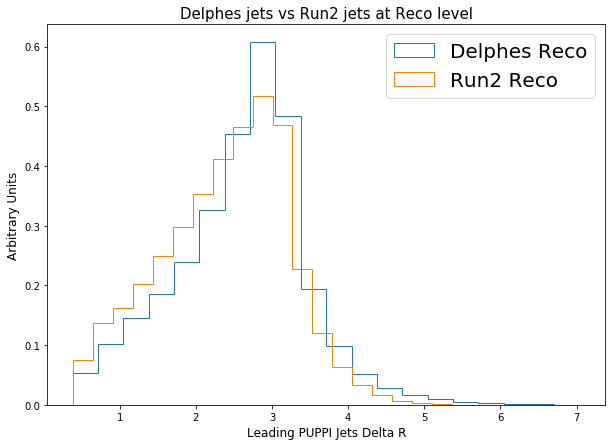

In [20]:
fig_style = {
    'figsize': (10, 7),
}

fig, ax = plt.subplots(**fig_style)

plt.title('Delphes jets vs Run2 jets at Reco level', fontsize=15)
plt.hist(delphes_dR, histtype='step', label = 'Delphes Reco', normed=True, bins=20)
plt.hist(dR, histtype='step' , label = 'Run2 Reco', normed=True, bins=20)

ax.legend(prop={'size': 20}, loc='upper right')
plt.xlabel('Leading PUPPI Jets Delta R', fontsize=12)
plt.ylabel('Arbitrary Units', fontsize=12)

In [16]:
jet_PUPPI_btag

<JaggedArray [[23 0 0 1 57] [0 58 0 43 0] [0 57 19 0] ... [43 61 0 ... 0 0 8] [1 0 59 ... 1 8 8] [27 0 0 ... 0 8 0]] at 0x00064fa747b8>

In [16]:
jet_pt = []
for i in range(len(jet_PUPPI_pt)) :
    if (len(jet_PUPPI_pt[i]) > 1) :
        if (jet_PUPPI_pt[i][1] > 30) :
            jet_pt.append(jet_PUPPI_pt[i][1])

In [18]:
tt_b_pt = tt_events_reco['b_pt'].array()

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'Arbitrary Units')

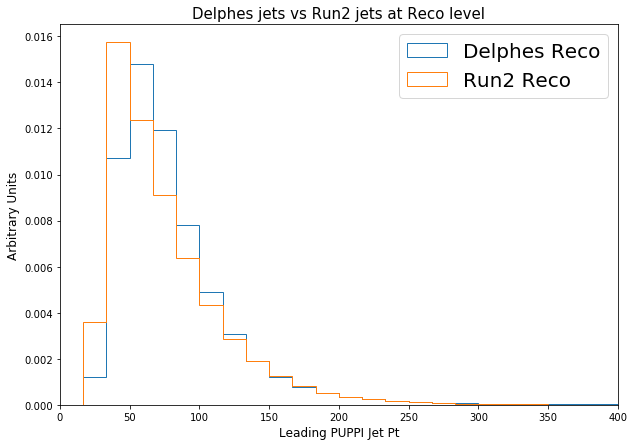

In [22]:
fig_style = {
    'figsize': (10, 7),
}

fig, ax = plt.subplots(**fig_style)

binning = np.linspace(0, 400,25)
plt.title('Delphes jets vs Run2 jets at Reco level', fontsize=15)
plt.hist(jet_pt, histtype='step', label = 'Delphes Reco', normed=True, bins  = binning)
plt.hist(tt_b_pt, histtype='step' , label = 'Run2 Reco', normed=True,  bins  = binning)

ax.legend(prop={'size': 20}, loc='upper right')
ax.set_xlim(0,400)
plt.xlabel('Leading PUPPI Jet Pt', fontsize=12)
plt.ylabel('Arbitrary Units', fontsize=12)

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


Text(0, 0.5, 'Arbitrary Units')

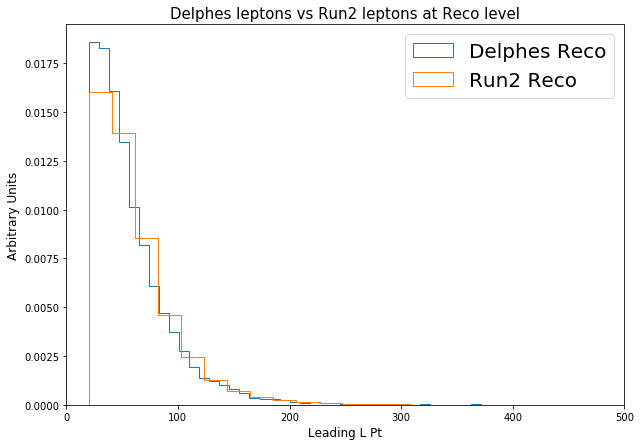

In [35]:
fig_style = {
    'figsize': (10, 7),
}

fig, ax = plt.subplots(**fig_style)

plt.title('Delphes leptons vs Run2 leptons at Reco level', fontsize=15)
plt.hist(l_pt, histtype='step', label = 'Delphes Reco', normed=True , bins =50)
plt.hist(tt_l_pt, histtype='step' , label = 'Run2 Reco', normed=True, bins =50)

ax.legend(prop={'size': 20}, loc='upper right')
ax.set_xlim(0,500)
plt.xlabel('Leading L Pt', fontsize=12)
plt.ylabel('Arbitrary Units', fontsize=12)

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


Text(0, 0.5, 'Arbitrary Units')

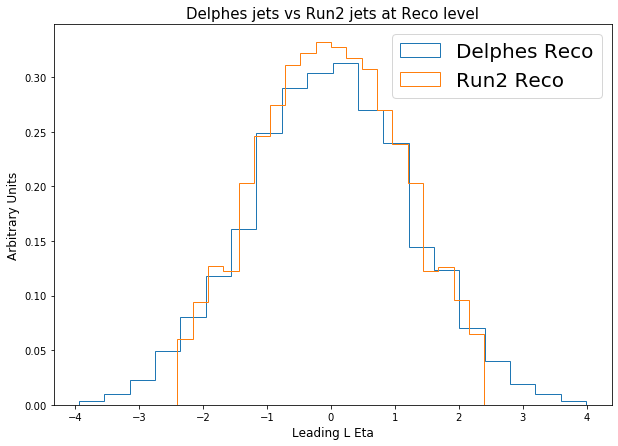

In [36]:
fig_style = {
    'figsize': (10, 7),
}

fig, ax = plt.subplots(**fig_style)

plt.title('Delphes jets vs Run2 jets at Reco level', fontsize=15)
plt.hist(l_eta, histtype='step', label = 'Delphes Reco', normed=True , bins =20)
plt.hist(tt_l_eta, histtype='step' , label = 'Run2 Reco', normed=True, bins =20)

ax.legend(prop={'size': 20}, loc='upper right')
plt.xlabel('Leading L Eta', fontsize=12)
plt.ylabel('Arbitrary Units', fontsize=12)

In [14]:
l_pt     = []
l_eta    = []
l_phi    = []
lbar_pt  = []
lbar_eta = []
lbar_phi = []

jet_pt   = []
jet_eta  = []
jet_phi  = []
ajet_pt  = []
ajet_eta = []
ajet_phi = []

for i in range(len(electron_CHS_pt)) :
    if (len(electron_CHS_pt[i]) > 0 and len(jet_PUPPI_pt[i]) > 0):     # Ensure non zero entries
        if (electron_CHS_pt[i][0] > 20 and jet_PUPPI_pt[i][0] > 30):   # Apply pt cut
            
            if (electron_CHS_charge[i][0] == +1 and jet_PUPPI_charge[i][0] == -1) :
                l_pt.append(electron_CHS_pt[i][0])
                l_eta.append(electron_CHS_eta[i][0])
                l_phi.append(electron_CHS_phi[i][0])
                
                ajet_pt.append(jet_PUPPI_pt[i][0])
                ajet_eta.append(jet_PUPPI_eta[i][0])
                ajet_phi.append(jet_PUPPI_phi[i][0])
            
            if (electron_CHS_charge[i][0] == -1 and jet_PUPPI_charge[i][0] == +1) :
                lbar_pt.append(electron_CHS_pt[i][0])
                lbar_eta.append(electron_CHS_eta[i][0])
                lbar_phi.append(electron_CHS_phi[i][0])
                
                jet_pt.append(jet_PUPPI_pt[i][0])
                jet_eta.append(jet_PUPPI_eta[i][0])
                jet_phi.append(jet_PUPPI_phi[i][0])

In [15]:
l_pt     = np.array(l_pt)
l_eta    = np.array(l_eta)
l_phi    = np.array(l_phi)
lbar_pt  = np.array(lbar_pt)
lbar_eta = np.array(lbar_eta)
lbar_phi = np.array(lbar_phi)

jet_pt   = np.array(jet_pt)
jet_eta  = np.array(jet_eta)
jet_phi  = np.array(jet_phi)
ajet_pt  = np.array(ajet_pt)
ajet_eta = np.array(ajet_eta)
ajet_phi = np.array(ajet_phi)

In [16]:
lj_deta  = abs(l_eta - ajet_eta)
lj_dphi  = (abs(abs(abs(l_phi - ajet_phi) - np.pi) - np.pi))

laj_deta = abs(lbar_eta - jet_eta)
laj_dphi = (abs(abs(abs(lbar_phi - jet_phi) - np.pi) - np.pi))

In [17]:
lj_dR    = np.sqrt(lj_deta**2  + lj_dphi**2) 
laj_dR   = np.sqrt(laj_deta**2 + laj_dphi**2) 

In [18]:
tt_lj_deta  = abs(tt_l_eta - tt_bbar_eta)
tt_lj_dphi  = (abs(abs(abs(tt_l_phi - tt_bbar_phi) - np.pi) - np.pi))

tt_laj_deta = abs(tt_lbar_eta - tt_b_eta)
tt_laj_dphi = (abs(abs(abs(tt_lbar_phi - tt_b_phi) - np.pi) - np.pi))

In [19]:
tt_lj_dR    = np.sqrt(tt_lj_deta**2  + tt_lj_dphi**2) 
tt_laj_dR   = np.sqrt(tt_laj_deta**2 + tt_laj_dphi**2) 

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


Text(0, 0.5, 'Arbitrary Units')

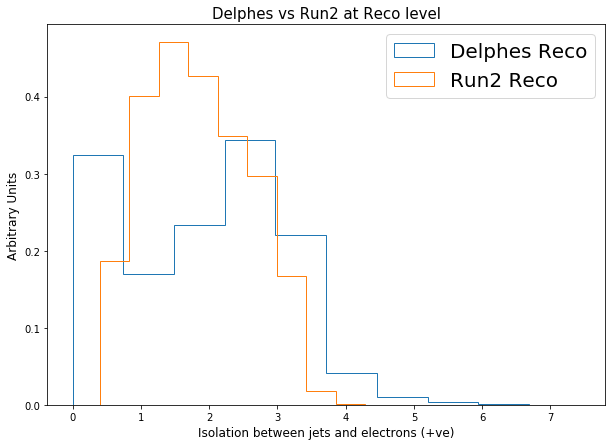

In [41]:
fig_style = {
    'figsize': (10, 7),
}

fig, ax = plt.subplots(**fig_style)

plt.title('Delphes vs Run2 at Reco level', fontsize=15)
plt.hist(lj_dR, histtype='step', label = 'Delphes Reco', normed=True )
plt.hist(tt_lj_dR, histtype='step' , label = 'Run2 Reco', normed=True)

ax.legend(prop={'size': 20}, loc='upper right')
plt.xlabel('Isolation between jets and electrons (+ve)', fontsize=12)
plt.ylabel('Arbitrary Units', fontsize=12)

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


Text(0, 0.5, 'Arbitrary Units')

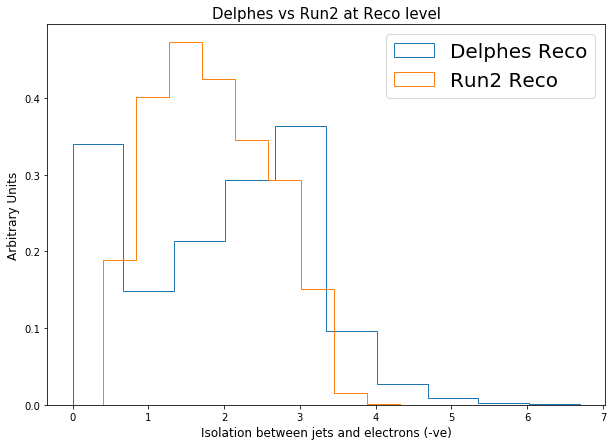

In [21]:
fig_style = {
    'figsize': (10, 7),
}

fig, ax = plt.subplots(**fig_style)

plt.title('Delphes vs Run2 at Reco level', fontsize=15)
plt.hist(laj_dR, histtype='step', label = 'Delphes Reco', normed=True )
plt.hist(tt_laj_dR, histtype='step' , label = 'Run2 Reco', normed=True)

ax.legend(prop={'size': 20}, loc='upper right')
plt.xlabel('Isolation between jets and electrons (-ve)', fontsize=12)
plt.ylabel('Arbitrary Units', fontsize=12)

In [20]:
lj_deta = []
lj_dphi = []
for i in range(len(electron_CHS_pt)) :
    if (len(electron_CHS_pt[i]) > 0 and len(jet_PUPPI_pt[i]) > 0):     # Ensure non zero entries
        if (electron_CHS_pt[i][0] > 30 and jet_PUPPI_pt[i][0] > 30):   # Apply pt cut
            lj_deta.append(abs(electron_CHS_eta[i][0] - jet_PUPPI_eta[i][0]))
            lj_dphi.append(abs(abs(abs(electron_CHS_phi[i][0] - jet_PUPPI_eta[i][0]) - np.pi) - np.pi))

In [21]:
lj_deta = np.array(lj_deta)
lj_dphi = np.array(lj_dphi)
lj_dR   = np.sqrt(lj_deta**2  + lj_dphi**2) 

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


Text(0, 0.5, 'Arbitrary Units')

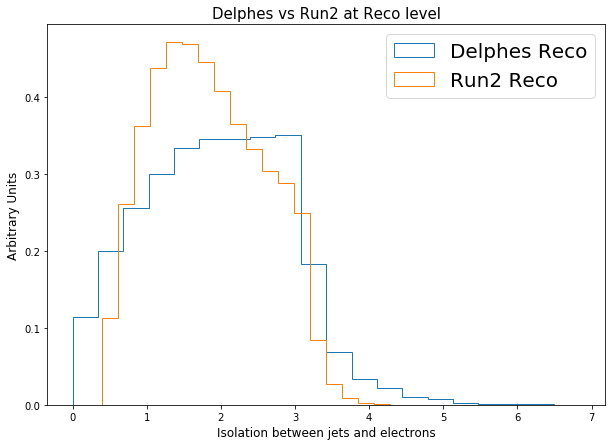

In [33]:
fig_style = {
    'figsize': (10, 7),
}

fig, ax = plt.subplots(**fig_style)

plt.title('Delphes vs Run2 at Reco level', fontsize=15)
plt.hist(lj_dR, histtype='step', label = 'Delphes Reco', normed=True , bins=20)
plt.hist(tt_lj_dR, histtype='step' , label = 'Run2 Reco', normed=True, bins=20 )

ax.legend(prop={'size': 20}, loc='upper right')
plt.xlabel('Isolation between jets and electrons', fontsize=12)
plt.ylabel('Arbitrary Units', fontsize=12)

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  app.launch_new_instance()


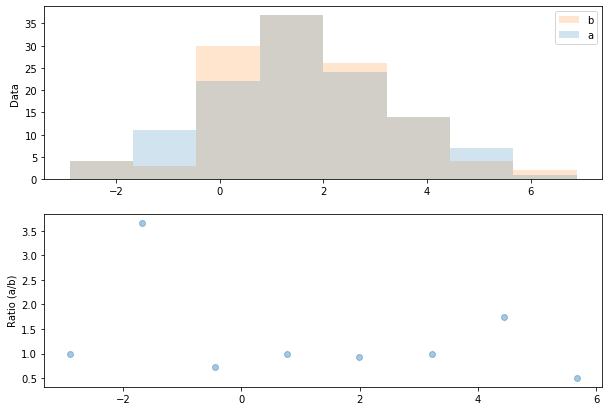

In [9]:
import matplotlib.pyplot as plt
from numpy.random import normal

fig_style = {
    'figsize': (10, 7),
}
y = []
y.append(normal(2, 2, size=120))
y.append(normal(2, 2, size=120))

fig, (ax1, ax2) = plt.subplots(nrows=2, **fig_style)
ns, bins, patches = ax1.hist(y, normed=False,
                      histtype='stepfilled',
                      bins=8,
                      alpha=0.2,
                      label=['a','b']
                      )
ax1.legend()

ax2.scatter(bins[:-1],     # this is what makes it comparable
        ns[0] / ns[1], # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Data')
ax2.set_ylabel('Ratio (a/b)')
plt.show()

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  from ipykernel import kernelapp as app
/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


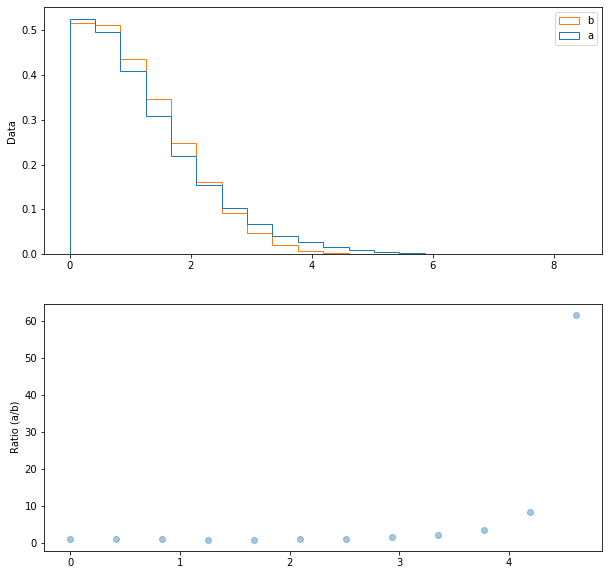

In [27]:
import matplotlib.pyplot as plt
from numpy.random import normal

fig_style = {
    'figsize': (10, 10),
}
y = []
y.append(jet_deta)
y.append(tt_bbbar_deta)

fig, (ax1, ax2) = plt.subplots(nrows=2, **fig_style)
ns, bins, patches = ax1.hist(y, normed=True,
                      histtype='step',
                      bins=20,
                      label=['a','b']
                      )
ax1.legend()

ax2.scatter(bins[:-1],     # this is what makes it comparable
        ns[0] / ns[1], # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Data')
ax2.set_ylabel('Ratio (a/b)')
plt.show()

In [65]:
bin_edges = np.linspace(0, 3, 20)
bin_centers  = (bin_edges[:-1] + bin_edges[1:])/2

In [66]:
d1 = np.histogram(jet_deta, bins=bin_edges, normed=True)[0]

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.


In [67]:
d2 = np.histogram(tt_bbbar_deta, bins=bin_edges, normed=True)[0]

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.


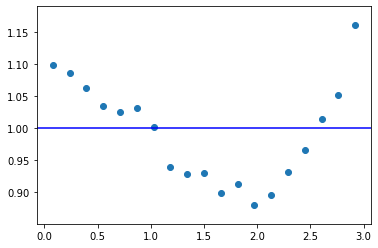

In [69]:
plt.scatter(bin_centers, d1/d2)
plt.axhline(y=1, color='b', linestyle='-')

In [23]:
np.histogram(jet_pt, bins=binning, normed=True)[1]

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.


array([  0.        ,  16.66666667,  33.33333333,  50.        ,
        66.66666667,  83.33333333, 100.        , 116.66666667,
       133.33333333, 150.        , 166.66666667, 183.33333333,
       200.        , 216.66666667, 233.33333333, 250.        ,
       266.66666667, 283.33333333, 300.        , 316.66666667,
       333.33333333, 350.        , 366.66666667, 383.33333333,
       400.        ])

In [24]:
np.histogram(tt_b_pt, bins=binning, normed=True)[1]

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.


array([  0.        ,  16.66666667,  33.33333333,  50.        ,
        66.66666667,  83.33333333, 100.        , 116.66666667,
       133.33333333, 150.        , 166.66666667, 183.33333333,
       200.        , 216.66666667, 233.33333333, 250.        ,
       266.66666667, 283.33333333, 300.        , 316.66666667,
       333.33333333, 350.        , 366.66666667, 383.33333333,
       400.        ])

In [50]:
len(d1/d2)

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


19

In [57]:
len(bin_edges)

20

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


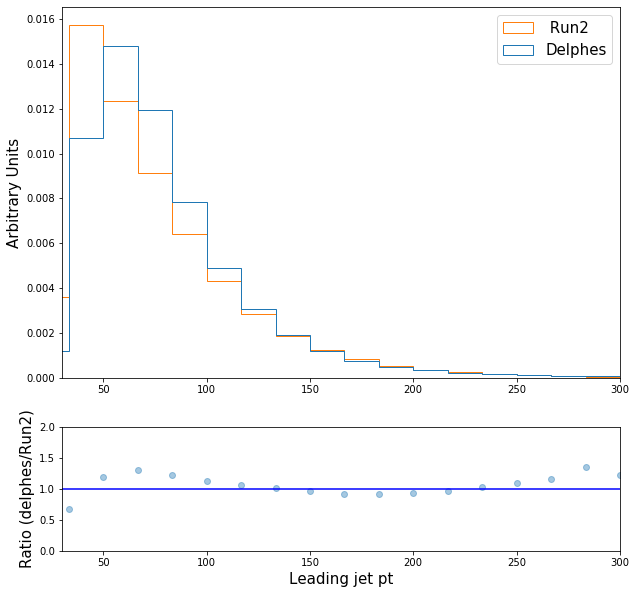

In [49]:
fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}
'''
fig, ax = plt.subplots(**fig_style)

plt.title('Delphes jets vs Run2 jets at Reco level', fontsize=15)
plt.hist(delphes_dR, histtype='step', label = 'Delphes Reco', normed=True, bins=20)
plt.hist(dR, histtype='step' , label = 'Run2 Reco', normed=True, bins=20)

ax.legend(prop={'size': 20}, loc='upper right')
plt.xlabel('Leading PUPPI Jets Delta R', fontsize=12)
plt.ylabel('Arbitrary Units', fontsize=12)
'''

y = []
y.append(jet_pt)
y.append(tt_b_pt)

fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns, bins, patches = ax1.hist(y, density=True,
                      histtype='step',
                      bins=binning,
                      label=['Delphes',' Run2 ']
                      )
ax1.legend(prop={'size': 15}, loc='upper right')
ax1.set_xlim(30, 300)
ax2.scatter(bins[:-1],     # this is what makes it comparable
        ns[0] / ns[1],     # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax2.set_ylabel('Ratio (delphes/Run2)', fontsize=15)
ax2.set_xlabel('Leading jet pt', fontsize=15)
ax2.set_ylim(0,2)
ax2.set_xlim(30,300)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

In [42]:
bins[:-1]

array([  0.        ,  16.66666667,  33.33333333,  50.        ,
        66.66666667,  83.33333333, 100.        , 116.66666667,
       133.33333333, 150.        , 166.66666667, 183.33333333,
       200.        , 216.66666667, 233.33333333, 250.        ,
       266.66666667, 283.33333333, 300.        , 316.66666667,
       333.33333333, 350.        , 366.66666667, 383.33333333])

In [46]:
ns[0] / ns[1]

/Users/amandeepsinghbakshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([       nan, 0.33422213, 0.6802373 , 1.19971898, 1.30855387,
       1.22337397, 1.13278914, 1.06651303, 1.0086643 , 0.97339759,
       0.92388555, 0.92486388, 0.93579832, 0.9687376 , 1.02765946,
       1.10460259, 1.16636975, 1.35382849, 1.22156533, 1.58086478,
       1.51051393, 2.16308571, 2.14211727, 2.33871322])